# **Задание 3**

*Откроем новый датасет Fly_Dataset.csv: в нем собрана информация про полеты и их цены.*

*Поработайте с признаками: какие-то проще будет отбросить, какие-то понадобится превратить из категориальных в числовые.*

*Обучите линейную регрессию.*

# 1. Импортируем нужные библиотеки

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

%matplotlib inline

# 2. Загружаем наш датасет

In [ ]:
fly_df = pd.read_csv('Fly_Dataset.csv', index_col=['Unnamed: 0'])
fly_df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


# 3. Оценка данных

In [ ]:
# выведем типы данных:
fly_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  int64  
 3   departure_time    300153 non-null  int64  
 4   stops             300153 non-null  int64  
 5   arrival_time      300153 non-null  int64  
 6   destination_city  300153 non-null  int64  
 7   class             300153 non-null  int64  
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 35.5+ MB


In [ ]:
# выведем основные статистические показатели (целевая переменная - цена за авто):
fly_df.describe().round(3)

,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
count,300153.000,300153.000,300153.000,300153.000,300153.000,300153.000,300153.000,300153.000,300153.000
mean,2.578,2.417,0.924,3.074,2.588,0.689,12.221,26.005,20889.661
std,1.752,1.754,0.398,1.742,1.745,0.463,7.192,13.561,22697.767
min,0.000,0.000,0.000,0.000,0.000,0.000,0.830,1.000,1105.000
25%,1.000,1.000,1.000,2.000,1.000,0.000,6.830,15.000,4783.000
50%,2.000,2.000,1.000,4.000,3.000,1.000,11.250,26.000,7425.000
75%,4.000,4.000,1.000,5.000,4.000,1.000,16.170,38.000,42521.000
max,5.000,5.000,2.000,5.000,5.000,1.000,49.830,49.000,123071.000


# **Feature Engineering:**

# 4. Обработка категориальных признаков

In [ ]:
# для 'stops' воспользуемся кодированием через метод replace(), чтобы передать иерархию категорий:
fly_df.stops.unique()
fly_df.stops.replace(['zero', 'one', 'two_or_more'], [0, 1, 2], inplace=True)

# для 'airline', 'flight', 'source_city', 'departure_time', 'destination_city', 'arrival_time' и 'class' воспользуемся кодированием через Label Encoder:
label_encoder = preprocessing.LabelEncoder()
fly_df['airline'] = label_encoder.fit_transform(fly_df['airline'])
fly_df['flight'] = label_encoder.fit_transform(fly_df['flight'])
fly_df['source_city'] = label_encoder.fit_transform(fly_df['source_city'])
fly_df['departure_time'] = label_encoder.fit_transform(fly_df['departure_time'])
fly_df['destination_city'] = label_encoder.fit_transform(fly_df['destination_city'])
fly_df['arrival_time'] = label_encoder.fit_transform(fly_df['arrival_time'])
fly_df['class'] = label_encoder.fit_transform(fly_df['class'])

fly_df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,1408,2,2,0,5,5,1,2.17,1,5953
1,4,1387,2,1,0,4,5,1,2.33,1,5953
2,0,1213,2,1,0,1,5,1,2.17,1,5956
3,5,1559,2,4,0,0,5,1,2.25,1,5955
4,5,1549,2,4,0,4,5,1,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,5,1477,1,4,1,2,3,0,10.08,49,69265
300149,5,1481,1,0,1,5,3,0,10.42,49,77105
300150,5,1486,1,1,1,5,3,0,13.83,49,79099
300151,5,1483,1,1,1,2,3,0,10.00,49,81585


# 5. Проверка распределения данных (выбросы, смещения)

Text(0.5, 1.0, 'Распределение данных')

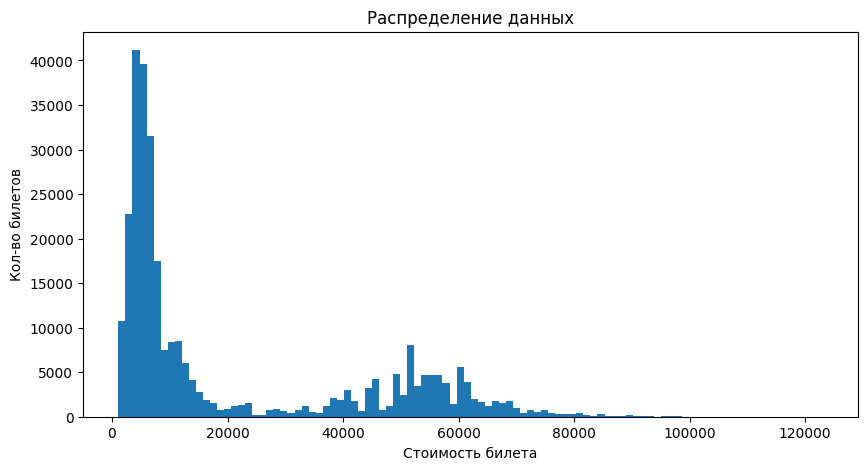

In [ ]:
# обнаружение аномалий через визуализацию (гистограмму hist):
plt.figure(figsize = (10,5))
plt.hist(fly_df['price'], bins=100)
plt.xlabel('Стоимость билета')
plt.ylabel('Кол-во билетов')
plt.title("Распределение данных")


In [ ]:
# гистограмма "Распределение данных" демонстрирует несбалансированность, явное разбиение по признаку 'сlass', поэтому делим датасет на две части по этому признаку:
fly_df_economy = fly_df[fly_df['class'] == 1].drop(columns = ['class'], axis = 1)
fly_df_business = fly_df[fly_df['class'] == 0].drop(columns = ['class'], axis = 1)

fly_df_economy

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,duration,days_left,price
0,4,1408,2,2,0,5,5,2.17,1,5953
1,4,1387,2,1,0,4,5,2.33,1,5953
2,0,1213,2,1,0,1,5,2.17,1,5956
3,5,1559,2,4,0,0,5,2.25,1,5955
4,5,1549,2,4,0,4,5,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
206661,5,1486,1,1,1,5,3,13.83,49,7697
206662,5,1486,1,1,1,5,3,13.83,49,7709
206663,5,1481,1,0,1,4,3,20.58,49,8640
206664,5,1477,1,4,1,4,3,23.33,49,8640


Text(0.5, 1.0, 'Распределение данных бизнес класса')

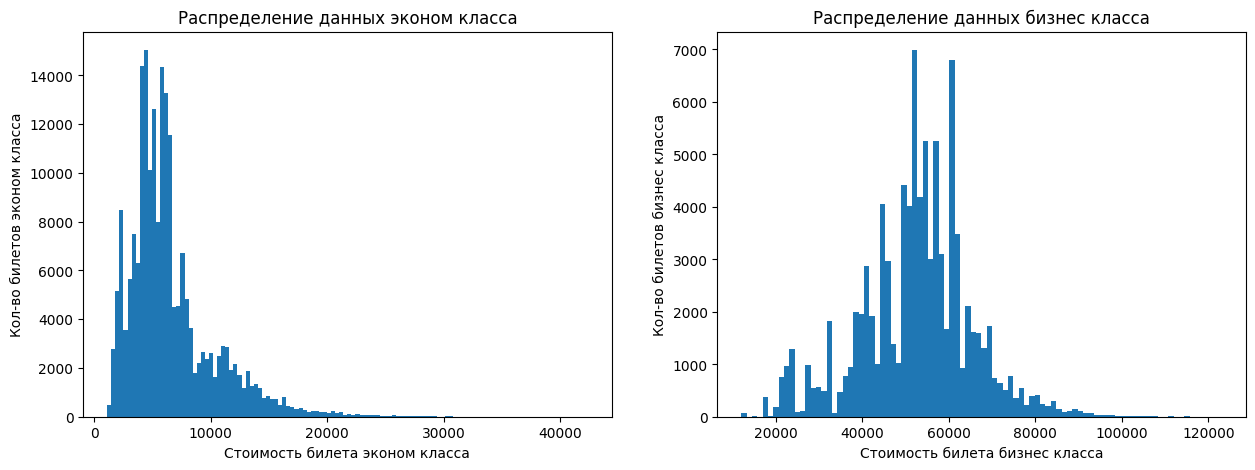

In [ ]:
# обнаружение аномалий в разделенных датасетах через визуализацию (гистограмму hist):
plt.figure(figsize = (15,5))

plt.subplot (1, 2, 1)
plt.hist(fly_df_economy['price'], bins=int(2 * np.cbrt(fly_df_economy.shape[0])) )
plt.xlabel('Стоимость билета эконом класса')
plt.ylabel('Кол-во билетов эконом класса')
plt.title("Распределение данных эконом класса")

plt.subplot (1, 2, 2)
plt.hist(fly_df_business['price'], bins=int(2 * np.cbrt(fly_df_business.shape[0])) )
plt.xlabel('Стоимость билета бизнес класса')
plt.ylabel('Кол-во билетов бизнес класса')
plt.title("Распределение данных бизнес класса")

Text(0.5, 1.0, 'Кол-во билетов эконом класса определенной стоимости (Логарифм)')

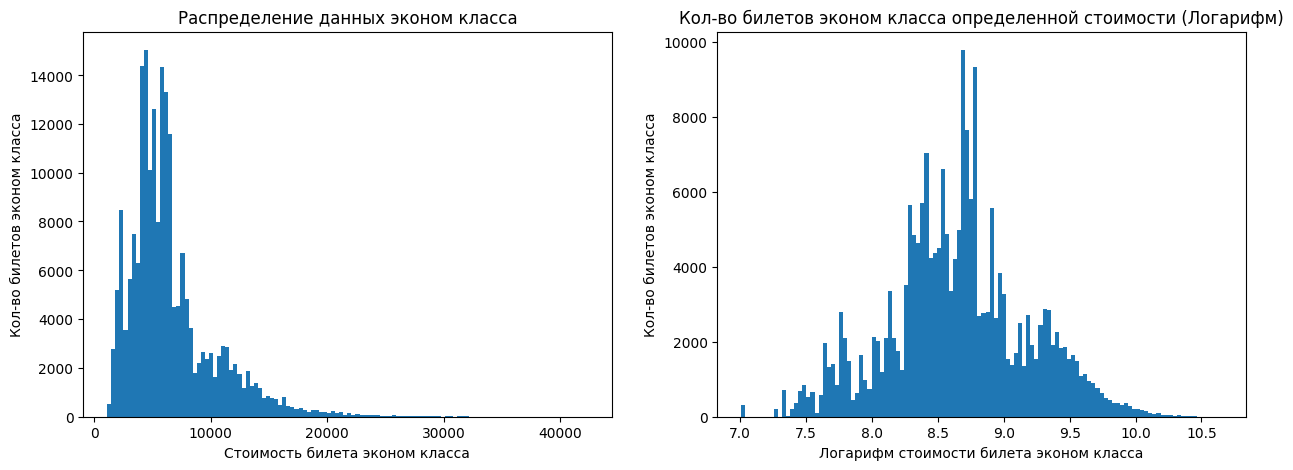

In [ ]:
# гистограмма "Распределение данных эконом класса" демонстрирует несбалансированность, сильное смещение (положительную ассиметрию), поэтому применим Логарифмирование:
y_log_economy = np.log(fly_df_economy['price'])

plt.figure(figsize = (15,5))

plt.subplot (1, 2, 1)
plt.hist(fly_df_economy['price'], bins=int(2 * np.cbrt(fly_df_economy.shape[0])) )
plt.xlabel('Стоимость билета эконом класса')
plt.ylabel('Кол-во билетов эконом класса')
plt.title("Распределение данных эконом класса")

plt.subplot (1, 2, 2)
plt.hist(y_log_economy, bins=int(2 * np.cbrt(fly_df_economy.shape[0])))
plt.xlabel('Логарифм стоимости билета эконом класса')
plt.ylabel('Кол-во билетов эконом класса')
plt.title("Кол-во билетов эконом класса определенной стоимости (Логарифм)")

Text(0.5, 1.0, 'Кол-во билетов бизнес класса определенной стоимости (Логарифм)')

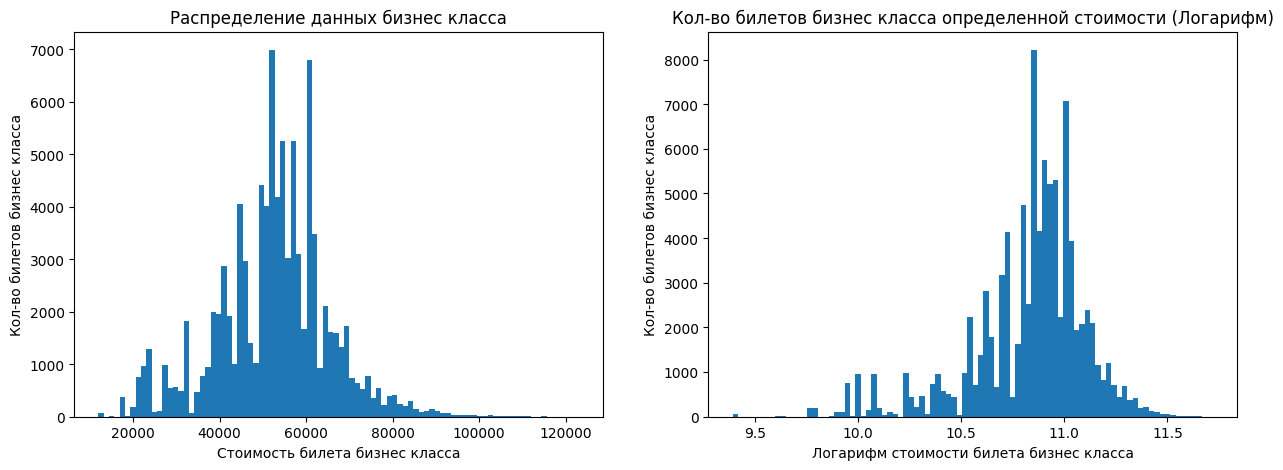

In [ ]:
# гистограмма "Распределение данных бизнес класса" демонстрирует выбросы, поэтому применим Логарифмирование:
y_log_business = np.log(fly_df_business['price'])

plt.figure(figsize = (15,5))

plt.subplot (1, 2, 1)
plt.hist(fly_df_business['price'], bins=int(2 * np.cbrt(fly_df_business.shape[0])) )
plt.xlabel('Стоимость билета бизнес класса')
plt.ylabel('Кол-во билетов бизнес класса')
plt.title("Распределение данных бизнес класса")

plt.subplot (1, 2, 2)
plt.hist(y_log_business, bins=int(2 * np.cbrt(fly_df_business.shape[0])))
plt.xlabel('Логарифм стоимости билета бизнес класса')
plt.ylabel('Кол-во билетов бизнес класса')
plt.title("Кол-во билетов бизнес класса определенной стоимости (Логарифм)")

# **Feature selection:**

# 6. Корреляция

In [ ]:
# корреляционный анализ используется для определения степени взаимосвязи между признаками и целевой переменной:
def PrintCorr(dataset):
    plt.figure(figsize=(15,5))
    corr = dataset.corr()
    sns.heatmap(corr,annot=True,linewidths=.5,fmt= '.2f',
                mask=np.zeros_like(corr, dtype=bool),
                cmap=sns.diverging_palette(100,200,as_cmap=True), square=True)

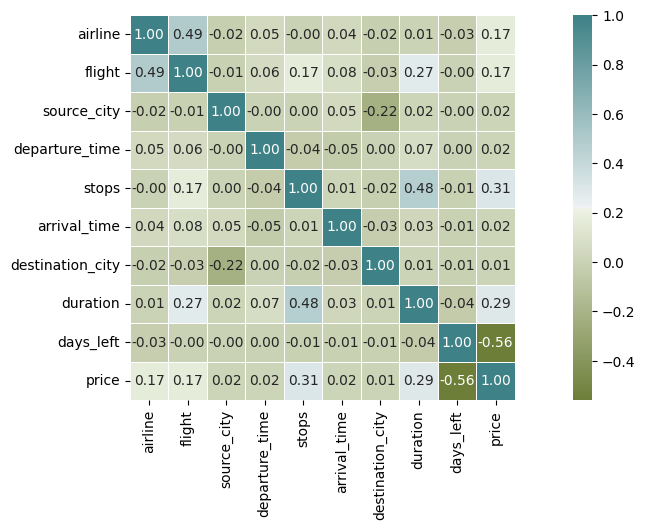

In [ ]:
PrintCorr(fly_df_economy)

# -положительная корреляция:
#  'price' & 'stops' (цена билета коррелирует с кол-м остановок)
#  'price' & 'duration' (цена билета коррелирует с длительностью полета)
#  'duration' & 'stops' (длительность полета коррелирует с кол-м остановок)
#   [(?) можем отбросить 'stops' и оставить 'duration']

#  'price' & 'airline' (цена билета коррелирует с названием авиакомпании)
#  'flight' & 'airline' (название полета коррелирует с названием авиакомпании)
#   [(?) можем отбросить 'flight' и оставить 'airline']

# -отрицательная корреляция:
#  'price' & 'days_left' (чем больше 'days_left', тем ниже 'price')

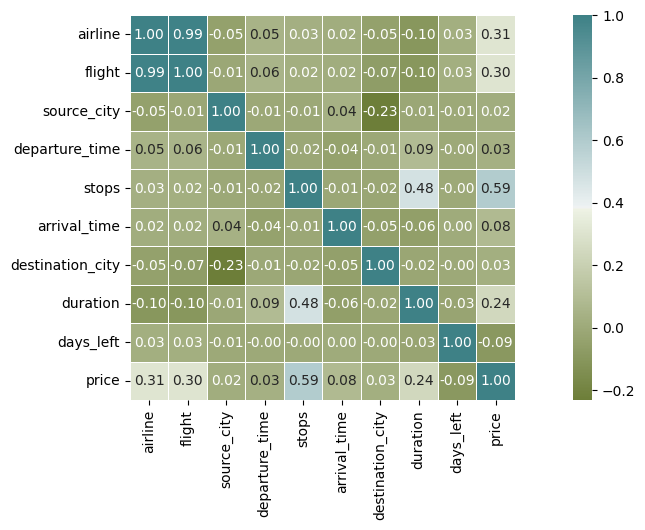

In [ ]:
PrintCorr(fly_df_business)

# -положительная корреляция:
#  'price' & 'stops' (цена билета коррелирует с кол-м остановок)
#  'price' & 'duration' (цена билета коррелирует с длительностью полета)
#  'duration' & 'stops' (длительность полета коррелирует с кол-м остановок)
#   [(?) можем отбросить 'stops' и оставить 'duration']

#  'price' & 'airline' (цена билета коррелирует с названием авиакомпании)
#  'price' & 'duration' (цена билета коррелирует с длительностью полета)
#   [(?) можем отбросить 'flight' и оставить 'airline']

# -отрицательная корреляция:
#  'price' & 'days_left' (чем больше 'days_left', тем ниже 'price')

## 7. Построение модели эконом класса

In [ ]:
# отбор признаков:
# признаки с наиболее высокой корреляцией с целевой переменной помещаем в X:
X_economy = fly_df_economy[['airline', 'days_left', 'duration']]
# целевую перменную поместим в y:
y_economy = fly_df_economy['price']

In [ ]:
# создадим функцию для обучения модели:
def LinReg(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # разобьем даннеы на обучающую и тестовую выборки

    model = LinearRegression() # создаем обьект класса Sklearn
    model.fit(X_train, y_train) # обучение модели

    y_pred = model.predict(X_test) # на основе нескольких независимых перемнных (X) предскажем цену билета (y)

    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) # cреднеквадратическая ошибка
    print('R2: ', np.round(metrics.r2_score(y_test, y_pred), 2)) # коэффициент детерминации
    print('MSE: ', "Train: ", mean_squared_error(pred_train, y_train) ** 0.5, "Test: ", mean_squared_error(pred_test, y_test) ** 0.5) # cреднеквадратическая ошибка
    print("Model train score: ", model.score(X_train, y_train), '\nModel test score: ', model.score(X_test, y_test))
    print('\n', pd.DataFrame(data=model.coef_, index=X_train.columns, columns=['coef']))

    return model, X_train, y_train

In [ ]:
LinReg(X_economy, y_economy)

RMSE:  2845.9785203366455
R2:  0.41
MSE:  Train:  2890.6916082064718 Test:  2845.9785203366455
Model train score:  0.40712971850479285 
Model test score:  0.4084414586073224

                  coef
airline    331.849034
days_left -151.274188
duration   136.664915


(LinearRegression(),
         airline  days_left  duration
 179214        1         35     12.25
 187031        2         46      9.17
 117650        1         27     13.17
 167716        5         23     12.33
 51603         2         44      2.17
 ...         ...        ...       ...
 119879        5          2     20.50
 103694        1          9     26.08
 131932        1         29     13.67
 146867        2         39      8.33
 121958        1         17     20.17
 
 [165332 rows x 3 columns],
 179214     4649
 187031     4827
 117650     3184
 167716     6461
 51603      2339
           ...  
 119879    22869
 103694    12214
 131932     5102
 146867     5574
 121958     6339
 Name: price, Length: 165332, dtype: int64)

коэффициент ассиметрии

In [ ]:
# коэффициент ассиметрии (Skew) определяет насколько ассиметрично распределяются данные.
# coef - коэффициент, показывающий насколько наша переменная подходит для анализа.
y_log_economy = np.log(fly_df_economy['price'])
model1_log, x_train, y_train = LinReg(X_economy, y_log_economy)

RMSE:  0.3935706661133842
R2:  0.44
MSE:  Train:  0.3954569736187579 Test:  0.3935706661133842
Model train score:  0.43871439556243585 
Model test score:  0.4389600664698864

                coef
airline    0.059569
days_left -0.020381
duration   0.023819


p_value

In [ ]:
# Чем меньше p_value, тем лучше. Если p_value большой, значит на выборку что-то повлияло:
X_incl_const = sm.add_constant(x_train)
model_sm = sm.OLS(y_train, X_incl_const)
results = model_sm.fit()
org_coef = pd.DataFrame({'coef': round(results.params, 4), 'p-value': round(results.pvalues, 4)})
org_coef

,coef,p-value
const,8.7368,0.0
airline,0.0596,0.0
days_left,-0.0204,0.0
duration,0.0238,0.0


vif (Мультиколлинеарность)

In [ ]:
# Корреляция отсутствует: vif = 1
# Умеренная коррреляция: 1 < vif <= 5
# Высокая коррреляция: 5 < vif <= 7.5
# Очень высокая коррреляция: более 7.5

vif = [variance_inflation_factor(exog=X_incl_const.values, exog_idx=i) for i in range (X_incl_const.shape[1])]
pd.DataFrame({'corf_name': X_incl_const.columns, 'vif':np.around(vif, 2)})

,corf_name,vif
0,const,10.39
1,airline,1.00
2,days_left,1.00
3,duration,1.00


ошибки

Text(0, 0.5, 'Residuals')

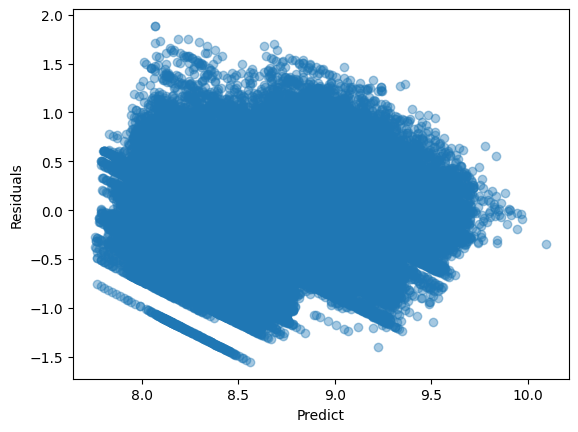

In [ ]:
plt.scatter(x=results.fittedvalues, y=results.resid, alpha=0.4)
plt.xlabel('Predict')
plt.ylabel('Residuals')

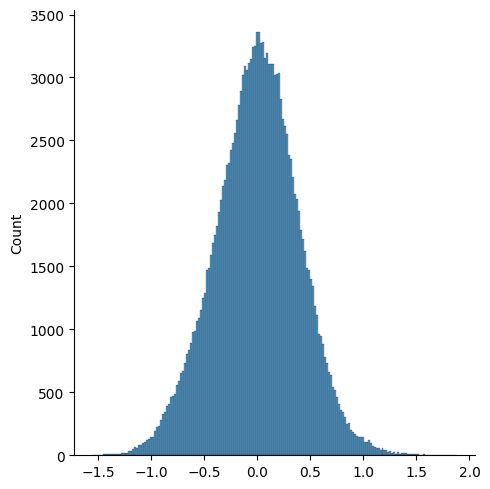

In [ ]:
sns.displot(results.resid)

## 8. Построение модели бизнес класса

In [ ]:
# отбор признаков:
# признаки с наиболее высокой корреляцией с целевой переменной помещаем в X:
X_business = fly_df_business[['airline', 'days_left', 'duration']]
# целевую перменную поместим в y:
y_business = fly_df_business['price']

In [ ]:
LinReg(X_business, y_business)

RMSE:  11767.362547565046
R2:  0.18
MSE:  Train:  11750.598084639241 Test:  11767.362547565046
Model train score:  0.17796966096636557 
Model test score:  0.18119593065124973

                   coef
airline    2284.434874
days_left   -87.493730
duration    514.870239


(LinearRegression(),
         airline  days_left  duration
 228233        1         33     12.75
 244199        5         39     15.25
 251002        5         28     15.42
 292741        5         38     11.08
 265497        5         23     11.00
 ...         ...        ...       ...
 212931        5         14      8.50
 261552        5          6     20.33
 283486        5         13     12.08
 207526        1         10      2.17
 222461        5         11     11.42
 
 [74789 rows x 3 columns],
 228233    41101
 244199    64173
 251002    84896
 292741    88003
 265497    64831
           ...  
 212931    42457
 261552    81519
 283486    48851
 207526    22152
 222461    52392
 Name: price, Length: 74789, dtype: int64)

коэффициент ассиметрии

In [ ]:
# коэффициент ассиметрии (Skew) определяет насколько ассиметрично распределяются данные.
y_log_business = np.log(fly_df_business['price'])
model1_log, x_train, y_train = LinReg(X_business, y_log_business)

RMSE:  0.2518825576364478
R2:  0.2
MSE:  Train:  0.2513526176623389 Test:  0.2518825576364478
Model train score:  0.19434129455693538 
Model test score:  0.19743943423754406

                coef
airline    0.045379
days_left -0.001462
duration   0.013764


p_value

In [ ]:
# Чем меньше p_value, тем лучше. Если p_value большой, значит на выборку что-то повлияло:
X_incl_const = sm.add_constant(x_train)
model_sm = sm.OLS(y_train, X_incl_const)
results = model_sm.fit()
org_coef = pd.DataFrame({'coef': round(results.params, 4), 'p-value': round(results.pvalues, 4)})
org_coef

,coef,p-value
const,10.5197,0.0
airline,0.0454,0.0
days_left,-0.0015,0.0
duration,0.0138,0.0


vif (Мультиколлинеарность)

In [ ]:
# Корреляция отсутствует: vif = 1
# Умеренная коррреляция: 1 < vif <= 5
# Высокая коррреляция: 5 < vif <= 7.5
# Очень высокая коррреляция: более 7.5

vif = [variance_inflation_factor(exog=X_incl_const.values, exog_idx=i) for i in range (X_incl_const.shape[1])]
pd.DataFrame({'corf_name': X_incl_const.columns, 'vif':np.around(vif, 2)})

,corf_name,vif
0,const,12.90
1,airline,1.01
2,days_left,1.00
3,duration,1.01


ошибки

Text(0, 0.5, 'Residuals')

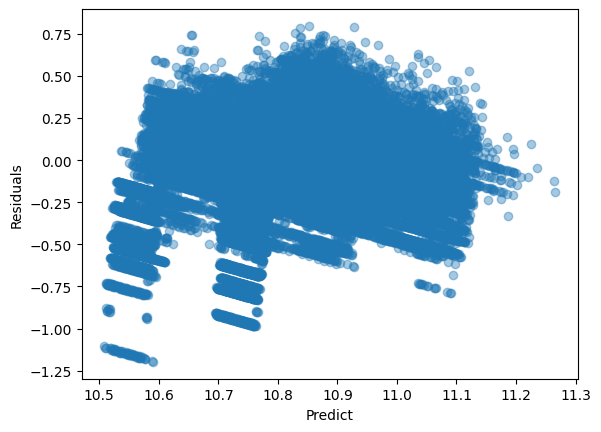

In [ ]:
plt.scatter(x=results.fittedvalues, y=results.resid, alpha=0.4)
plt.xlabel('Predict')
plt.ylabel('Residuals')

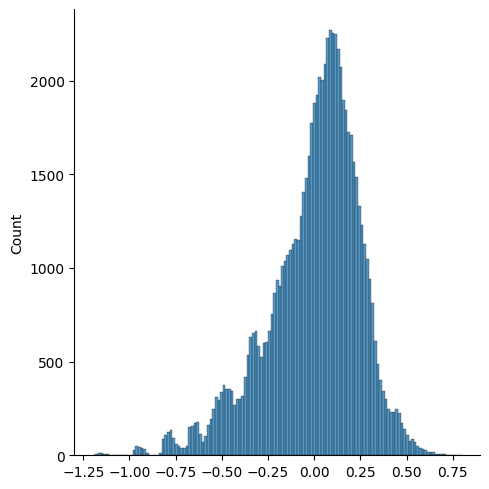

In [ ]:
sns.displot(results.resid)

## 9. Построение модели эконом + бизнес классы

In [ ]:
# отбор признаков:
# признаки с наиболее высокой корреляцией с целевой переменной помещаем в X:
X = fly_df[['airline', 'days_left', 'duration']]
# целевую перменную поместим в y:
y = fly_df['price']

In [ ]:
LinReg(X, y)

RMSE:  21405.280908972236
R2:  0.11
MSE:  Train:  21449.205770910652 Test:  21405.280908972236
Model train score:  0.10685936220854475 
Model test score:  0.11115071402975452

                   coef
airline    2995.441749
days_left  -136.426338
duration    631.976971


(LinearRegression(),
         airline  days_left  duration
 148417        1          6     19.42
 36879         3         13      7.00
 274531        1         44     21.17
 166397        5         11     10.25
 272722        5          5     26.50
 ...         ...        ...       ...
 119879        5          2     20.50
 259178        5          7     25.42
 131932        1         29     13.67
 146867        2         39      8.33
 121958        1         17     20.17
 
 [240122 rows x 3 columns],
 148417    13524
 36879      9940
 274531    55983
 166397     7927
 272722    55502
           ...  
 119879    22869
 259178    44280
 131932     5102
 146867     5574
 121958     6339
 Name: price, Length: 240122, dtype: int64)

коэффициент ассиметрии

In [ ]:
# коэффициент ассиметрии (Skew) определяет насколько ассиметрично распределяются данные.
y_log = np.log(fly_df['price'])
model1_log, x_train, y_train = LinReg(X, y_log)

RMSE:  1.014094873158074
R2:  0.17
MSE:  Train:  1.0167440831909333 Test:  1.014094873158074
Model train score:  0.16507937981990983 
Model test score:  0.16984344993494638

                coef
airline    0.151366
days_left -0.014858
duration   0.039624


p_value

In [ ]:
# Чем меньше p_value, тем лучше. Если p_value большой, значит на выборку что-то повлияло:
X_incl_const = sm.add_constant(x_train)
model_sm = sm.OLS(y_train, X_incl_const)
results = model_sm.fit()
org_coef = pd.DataFrame({'coef': round(results.params, 4), 'p-value': round(results.pvalues, 4)})
org_coef

,coef,p-value
const,8.7627,0.0
airline,0.1514,0.0
days_left,-0.0149,0.0
duration,0.0396,0.0


vif (Мультиколлинеарность)

In [ ]:
# Корреляция отсутствует: vif = 1
# Умеренная коррреляция: 1 < vif <= 5
# Высокая коррреляция: 5 < vif <= 7.5
# Очень высокая коррреляция: более 7.5

vif = [variance_inflation_factor(exog=X_incl_const.values, exog_idx=i) for i in range (X_incl_const.shape[1])]
pd.DataFrame({'corf_name': X_incl_const.columns, 'vif':np.around(vif, 2)})

,corf_name,vif
0,const,10.79
1,airline,1.00
2,days_left,1.00
3,duration,1.00


ошибки

Text(0, 0.5, 'Residuals')

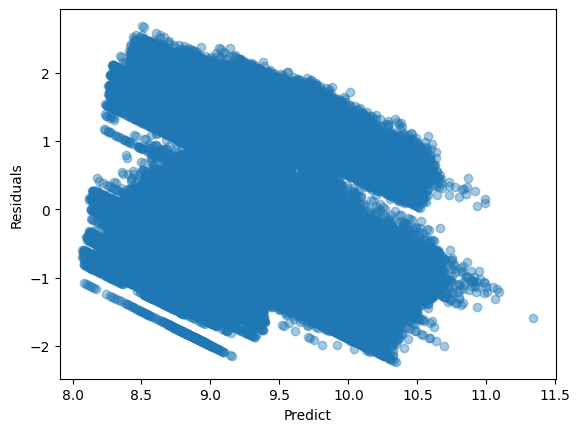

In [ ]:
plt.scatter(x=results.fittedvalues, y=results.resid, alpha=0.4)
plt.xlabel('Predict')
plt.ylabel('Residuals')

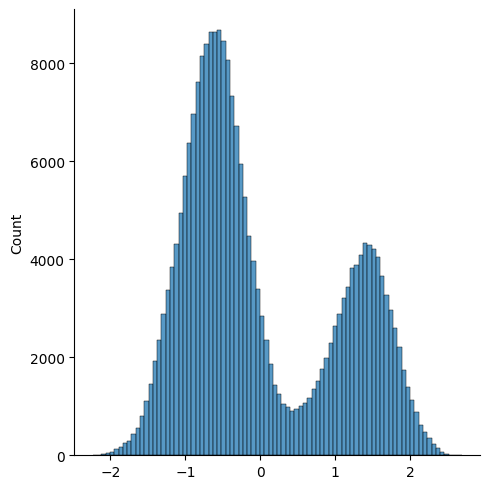

In [ ]:
sns.displot(results.resid)

# **HomeWork**

*Предсказываем цену автомобиля*

*В папке лежит датасет Car details, в котором содержатся сведения об автомобилях, их характеристики и цены. Обучите модель линейной регрессии, которая будет предсказывать цену автомобиля по его характеристикам.*

*Придется хорошенько поработать с характеристиками: это творческая часть задания.*

*Во-первых, надо привести их в машиночитаемый вид*

*Во-вторых, можно посмотреть, как они коррелируют друг с другом и не нужно ли кого-то из них дропнуть или наоборот.*

# 1. Загружаем наш датасет

In [ ]:
car_df = pd.read_csv('Car_details.csv')
car_df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


# 2. Оценка данных

In [ ]:
# выведем типы данных:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [ ]:
# выведем основные статистические показатели (целевая переменная - цена за авто):
car_df.describe().round(3)

,year,selling_price,km_driven,seats
count,8128.000,8.128000e+03,8128.000,7907.000
mean,2013.804,6.382718e+05,69819.511,5.417
std,4.044,8.062534e+05,56550.555,0.960
min,1983.000,2.999900e+04,1.000,2.000
25%,2011.000,2.549990e+05,35000.000,5.000
50%,2015.000,4.500000e+05,60000.000,5.000
75%,2017.000,6.750000e+05,98000.000,5.000
max,2020.000,1.000000e+07,2360457.000,14.000


# **Feature Engineering:**

# 3. Обработка категориальных признаков

In [ ]:
car_df['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [ ]:
# для 'owner' воспользуемся кодированием через метод replace(), чтобы передать иерархию категорий:
car_df.owner.unique()
car_df.owner.replace(['Test Drive Car', 'First Owner', 'Second Owner', 'Third Owner', 'Fourth & Above Owner'], [0, 1, 2, 3, 4], inplace=True)

# для 'name', 'fuel', 'seller_type', 'transmission', 'torque' воспользуемся кодированием через Label Encoder:
label_encoder = preprocessing.LabelEncoder()
car_df['name'] = label_encoder.fit_transform(car_df['name'])
car_df['fuel'] = label_encoder.fit_transform(car_df['fuel'])
car_df['seller_type'] = label_encoder.fit_transform(car_df['seller_type'])
car_df['transmission'] = label_encoder.fit_transform(car_df['transmission'])
car_df['torque'] = label_encoder.fit_transform(car_df['torque'])

# для удаления единиц измерения воспользуемся методом str.replace():
car_df['mileage'] = car_df['mileage'].str.replace('kmpl','')
car_df['mileage'] = car_df['mileage'].str.replace('km/kg','')
car_df['engine'] = car_df['engine'].str.replace('CC','')
car_df['max_power'] = car_df['max_power'].str.replace('bhp','')

car_df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,1307,2014,450000,145500,1,1,1,1,23.4,1248,74,178,5.0
1,1607,2014,370000,120000,1,1,1,2,21.14,1498,103.52,260,5.0
2,385,2006,158000,140000,3,1,1,3,17.7,1497,78,66,5.0
3,781,2010,225000,127000,1,1,1,1,23.0,1396,90,224,5.0
4,1349,2007,130000,120000,3,1,1,1,16.1,1298,88.2,21,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,771,2013,320000,110000,3,1,1,1,18.5,1197,82.85,37,5.0
8124,656,2007,135000,119000,1,1,1,4,16.8,1493,110,250,5.0
8125,1319,2009,382000,120000,1,1,1,1,19.3,1248,73.9,178,5.0
8126,1699,2013,290000,25000,1,1,1,1,23.57,1396,70,106,5.0


In [ ]:
# убираем все пробельные символы:
car_df = car_df.replace(r'\s+','',regex=True)
# заменим все NaN на ноль:
car_df = car_df.fillna(0)

In [ ]:
car_df['max_power'].unique()

array(['74', '103.52', '78', '90', '88.2', '81.86', '57.5', '37', '67.1',
       '68.1', '108.45', '60', '73.9', 0, '67', '82', '88.5', '46.3',
       '88.73', '64.1', '98.6', '88.8', '83.81', '83.1', '47.3', '73.8',
       '34.2', '35', '81.83', '40.3', '121.3', '138.03', '160.77',
       '117.3', '116.3', '83.14', '67.05', '168.5', '100', '120.7',
       '98.63', '175.56', '103.25', '171.5', '100.6', '174.33', '187.74',
       '170', '78.9', '88.76', '86.8', '108.495', '108.62', '93.7',
       '103.6', '98.59', '189', '67.04', '68.05', '58.2', '82.85',
       '81.80', '73', '120', '94.68', '160', '65', '155', '69.01',
       '126.32', '138.1', '83.8', '126.2', '98.96', '62.1', '86.7', '188',
       '214.56', '177', '280', '148.31', '254.79', '190', '177.46', '204',
       '141', '117.6', '241.4', '282', '150', '147.5', '108.5', '103.5',
       '183', '181.04', '157.7', '164.7', '91.1', '400', '68', '75',
       '85.8', '87.2', '53', '118', '103.2', '83', '84', '58.16',
       '147.94

In [ ]:
car_df = car_df.astype({'max_power': np.float})

In [ ]:
car_df = car_df.astype({'mileage': np.float})
car_df['engine'] = car_df['engine'].astype(int)

<ipython-input-10-2d235546541d>:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  car_df = car_df.astype({'mileage': np.float})


In [ ]:
car_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   int64  
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   int64  
 5   seller_type    8128 non-null   int64  
 6   transmission   8128 non-null   int64  
 7   owner          8128 non-null   int64  
 8   mileage        8128 non-null   float64
 9   engine         8128 non-null   int64  
 10  max_power      8128 non-null   object 
 11  torque         8128 non-null   int64  
 12  seats          8128 non-null   float64
dtypes: float64(2), int64(10), object(1)
memory usage: 825.6+ KB


# 4. Проверка распределения данных (выбросы, смещения)

Text(0.5, 1.0, 'Распределение данных')

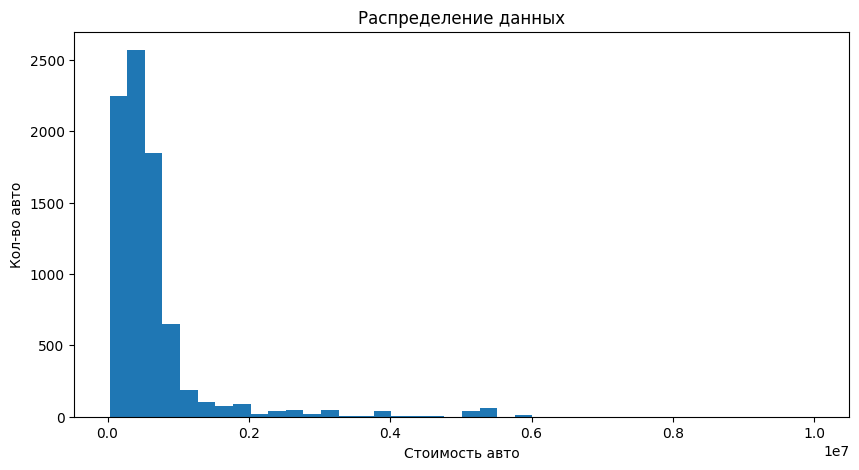

In [ ]:
# обнаружение аномалий через визуализацию (гистограмму hist):
plt.figure(figsize = (10,5))
plt.hist(car_df['selling_price'], bins=int(2 * np.cbrt(car_df.shape[0])) )
plt.xlabel('Стоимость авто')
plt.ylabel('Кол-во авто')
plt.title("Распределение данных")

Text(0.5, 1.0, 'Кол-во авто определенной стоимости (Логарифм)')

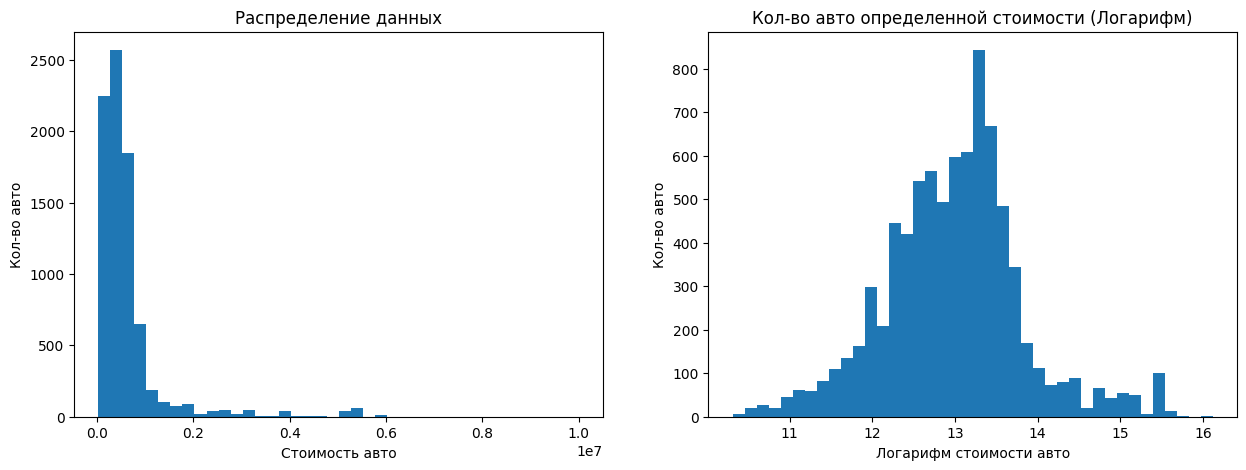

In [ ]:
# гистограмма "Распределение данных" демонстрирует несбалансированность, сильное смещение (положительную ассиметрию), поэтому применим Логарифмирование:
y_log = np.log(car_df['selling_price'])

plt.figure(figsize = (15,5))

plt.subplot (1, 2, 1)
plt.hist(car_df['selling_price'], bins=int(2 * np.cbrt(car_df.shape[0])) )
plt.xlabel('Стоимость авто')
plt.ylabel('Кол-во авто')
plt.title("Распределение данных")

plt.subplot (1, 2, 2)
plt.hist(y_log, bins=int(2 * np.cbrt(car_df.shape[0])))
plt.xlabel('Логарифм стоимости авто')
plt.ylabel('Кол-во авто')
plt.title("Кол-во авто определенной стоимости (Логарифм)")

# **Feature selection:**

# 5. Корреляция

In [ ]:
# корреляционный анализ используется для определения степени взаимосвязи между признаками и целевой переменной:
def PrintCorr(dataset):
    plt.figure(figsize=(15,5))
    corr = dataset.corr()
    sns.heatmap(corr,annot=True,linewidths=.5,fmt= '.2f',
                mask=np.zeros_like(corr, dtype=bool),
                cmap=sns.diverging_palette(100,200,as_cmap=True), square=True)

<ipython-input-14-492ab47160da>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dataset.corr()


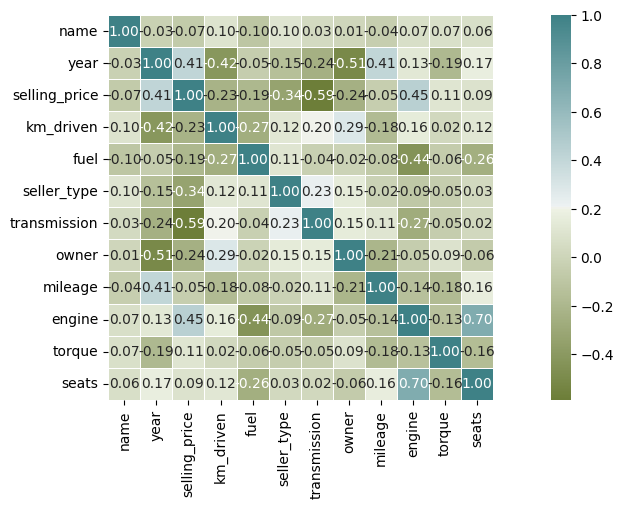

In [ ]:
PrintCorr(car_df)

## 6. Построение модели

In [ ]:
# отбор признаков:
# признаки с наиболее высокой корреляцией с целевой переменной помещаем в X:
X = car_df.drop(columns=['selling_price', 'max_power'])
# целевую перменную поместим в y:
y = car_df['selling_price']

In [ ]:
# создадим функцию для обучения модели:
def LinReg(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # разобьем даннеы на обучающую и тестовую выборки

    model = LinearRegression() # создаем обьект класса Sklearn
    model.fit(X_train, y_train) # обучение модели

    y_pred = model.predict(X_test) # на основе нескольких независимых перемнных (X) предскажем цену билета (y)

    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) # cреднеквадратическая ошибка
    print('R2: ', np.round(metrics.r2_score(y_test, y_pred), 2)) # коэффициент детерминации
    print('MSE: ', "Train: ", mean_squared_error(pred_train, y_train) ** 0.5, "Test: ", mean_squared_error(pred_test, y_test) ** 0.5) # cреднеквадратическая ошибка
    print("Model train score: ", model.score(X_train, y_train), '\nModel test score: ', model.score(X_test, y_test))
    print('\n', pd.DataFrame(data=model.coef_, index=X_train.columns, columns=['coef']))

    return model, X_train, y_train

In [ ]:
LinReg(X, y)

RMSE:  496328.6366461427
R2:  0.62
MSE:  Train:  504434.36831914564 Test:  496328.6366461427
Model train score:  0.6076772621861253 
Model test score:  0.6241831226337929

                        coef
name             -88.776767
year           57011.412350
km_driven         -1.007991
fuel          -29999.061722
seller_type  -281078.900031
transmission -749583.502373
owner         -21713.027859
mileage          -68.572108
engine           777.223252
torque          1003.714378
seats        -183137.441733


(LinearRegression(),
       name  year  km_driven  fuel  seller_type  transmission  owner  mileage  \
 6518  1837  2019       2560     3            1             0      1    24.00   
 6144   364  2013      80000     3            1             1      2    19.40   
 6381   726  2011     150000     1            1             1      4    23.00   
 438   1307  2013     120000     1            1             1      2    23.40   
 5939  1098  2017      25000     3            1             1      1    23.95   
 ...    ...   ...        ...   ...          ...           ...    ...      ...   
 5226   927  2009     120000     1            1             1      1    12.05   
 5390  1307  2014      80000     1            1             1      2    23.40   
 860    763  2016      35000     3            1             1      1    18.60   
 7603  1307  2019      27000     1            1             1      1    28.40   
 7270  1057  2006      70000     3            1             1      2    16.10   
 
     

коэффициент ассиметрии

In [ ]:
# коэффициент ассиметрии (Skew) определяет насколько ассиметрично распределяются данные.
# coef - коэффициент, показывающий насколько наша переменная подходит для анализа.
y_log = np.log(car_df['selling_price'])
model1_log, x_train, y_train = LinReg(X, y_log)

RMSE:  0.3667541638772636
R2:  0.8
MSE:  Train:  0.36848806823258784 Test:  0.3667541638772636
Model train score:  0.8084328813239758 
Model test score:  0.8036617558099299

                       coef
name         -3.524549e-05
year          1.292990e-01
km_driven    -4.037314e-07
fuel         -1.174627e-01
seller_type  -1.267837e-01
transmission -4.635652e-01
owner        -5.943128e-02
mileage      -1.252100e-02
engine        6.892679e-04
torque        1.184687e-04
seats        -1.174982e-01


p_value

In [ ]:
# Чем меньше p_value, тем лучше. Если p_value большой, значит на выборку что-то повлияло:
X_incl_const = sm.add_constant(x_train)
model_sm = sm.OLS(y_train, X_incl_const)
results = model_sm.fit()
org_coef = pd.DataFrame({'coef': round(results.params, 4), 'p-value': round(results.pvalues, 4)})
org_coef

,coef,p-value
const,-246.6680,0.0000
name,-0.0000,0.0000
year,0.1293,0.0000
km_driven,-0.0000,0.0000
fuel,-0.1175,0.0000
seller_type,-0.1268,0.0000
transmission,-0.4636,0.0000
owner,-0.0594,0.0000
mileage,-0.0125,0.0000
engine,0.0007,0.0000


vif (Мультиколлинеарность)

In [ ]:
# Корреляция отсутствует: vif = 1
# Умеренная коррреляция: 1 < vif <= 5
# Высокая коррреляция: 5 < vif <= 7.5
# Очень высокая коррреляция: более 7.5

vif = [variance_inflation_factor(exog=X_incl_const.values, exog_idx=i) for i in range (X_incl_const.shape[1])]
pd.DataFrame({'corf_name': X_incl_const.columns, 'vif':np.around(vif, 2)})

,corf_name,vif
0,const,462038.20
1,name,1.04
2,year,1.88
3,km_driven,1.38
4,fuel,1.52
5,seller_type,1.12
6,transmission,1.42
7,owner,1.37
8,mileage,1.55
9,engine,3.45


BIC

In [ ]:
# Чем меньше bic, тем лучше.
print('BIC - ', results.bic)
print('R2 - ', results.rsquared)
print('R2 (adjusted)  - ', results.rsquared_adj)

BIC -  5574.731366078355
R2 -  0.808432881323975
R2 (adjusted)  -  0.8081081912923207


In [ ]:
def StatLinReg(X_train, y_train, drop_columns = []):
    X_incl_const = sm.add_constant(X_train)
    X_incl_const = X_incl_const.drop(drop_columns, axis=1)

    model_sm = sm.OLS(y_train, X_incl_const)
    results = model_sm.fit()
    org_coef = pd.DataFrame({'coef': round(results.params, 4), 'p-value': round(results.pvalues, 4)})
    print('BIC - ', results.bic)
    print('R2 - ', results.rsquared)
    print('R2 (adjusted)  - ', results.rsquared_adj)
    return org_coef